In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import stats
import seaborn as sns; sns.set()
from statsmodels.api import OLS
from datetime import datetime

users = pd.read_csv('data/users.csv')
tweets = pd.read_csv('data/tweets.csv')

C:\Users\Carmijh0\Anoconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 14 columns):
id                  393 non-null float64
location            285 non-null object
name                384 non-null object
followers_count     384 non-null float64
statuses_count      384 non-null float64
time_zone           369 non-null object
verified            384 non-null object
lang                384 non-null object
screen_name         454 non-null object
description         339 non-null object
created_at          384 non-null object
favourites_count    384 non-null float64
friends_count       384 non-null float64
listed_count        384 non-null float64
dtypes: float64(6), object(8)
memory usage: 49.7+ KB


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203482 entries, 0 to 203481
Data columns (total 16 columns):
user_id                  195417 non-null float64
user_key                 203482 non-null object
created_at               203461 non-null float64
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
tweet_id                 201168 non-null float64
source                   58084 non-null object
hashtags                 203482 non-null object
expanded_urls            203482 non-null object
posted                   203482 non-null object
mentions                 203482 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(7), object(9)
memory usage: 24.8+ MB


In [4]:
users.head()

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
3,249538861.0,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
4,449689677.0,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0


In [5]:
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [6]:
percent = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)
total = users.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
location,169,0.372247
description,115,0.253304
time_zone,85,0.187225
listed_count,70,0.154185
friends_count,70,0.154185
favourites_count,70,0.154185
created_at,70,0.154185
lang,70,0.154185
verified,70,0.154185
statuses_count,70,0.154185


In [7]:
percent = (tweets.isnull().sum()/tweets.isnull().count()).sort_values(ascending=False)
total = tweets.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
in_reply_to_status_id,202923,0.997253
retweeted_status_id,163831,0.805138
favorite_count,145399,0.714555
retweeted,145399,0.714555
retweet_count,145399,0.714555
source,145398,0.714550
user_id,8065,0.039635
tweet_id,2314,0.011372
text,21,0.000103
created_str,21,0.000103


In [8]:
tweets.isnull().sum()

user_id                    8065
user_key                      0
created_at                   21
created_str                  21
retweet_count            145399
retweeted                145399
favorite_count           145399
text                         21
tweet_id                   2314
source                   145398
hashtags                      0
expanded_urls                 0
posted                        0
mentions                      0
retweeted_status_id      163831
in_reply_to_status_id    202923
dtype: int64

In [9]:
tweets = tweets.drop(['retweeted_status_id', 'in_reply_to_status_id'], axis=1)
tweets.shape

(203482, 14)

In [10]:
tweets.isnull().sum()

user_id             8065
user_key               0
created_at            21
created_str           21
retweet_count     145399
retweeted         145399
favorite_count    145399
text                  21
tweet_id            2314
source            145398
hashtags               0
expanded_urls          0
posted                 0
mentions               0
dtype: int64

In [11]:
# test = tweets.dropna(subset=['retweet_count', 'retweeted'])
# test.shape

In [12]:
users.isnull().sum()

id                   61
location            169
name                 70
followers_count      70
statuses_count       70
time_zone            85
verified             70
lang                 70
screen_name           0
description         115
created_at           70
favourites_count     70
friends_count        70
listed_count         70
dtype: int64

In [13]:
users = users.drop(['location', 'time_zone'], axis=1)

In [14]:
users.columns

Index(['id', 'name', 'followers_count', 'statuses_count', 'verified', 'lang',
       'screen_name', 'description', 'created_at', 'favourites_count',
       'friends_count', 'listed_count'],
      dtype='object')

In [15]:
users.lang.value_counts()

en    273
ru     90
de     18
es      1
fr      1
id      1
Name: lang, dtype: int64

In [16]:
users.verified.value_counts()

False    384
Name: verified, dtype: int64

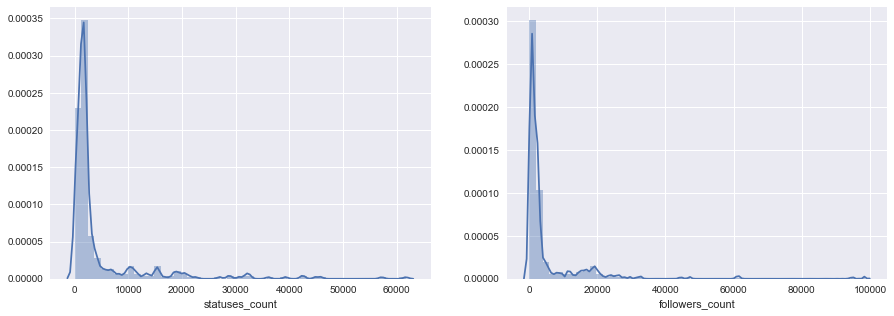

In [17]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(users[np.isfinite(users.statuses_count)].statuses_count, ax=ax[0])
sns.distplot(users[np.isfinite(users.followers_count)].followers_count, ax=ax[1])
plt.show()

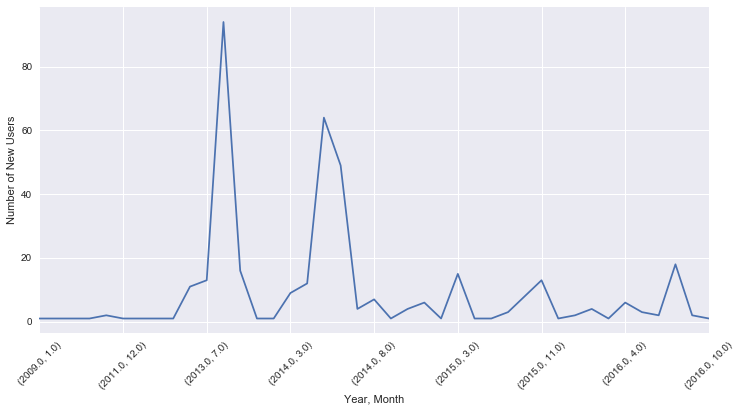

In [18]:
form = '%a %b %d %H:%M:%S %z %Y'
users = users.assign(date = users.created_at.map(
    lambda x: datetime.strptime(str(x), form).date() if x is not np.nan else None))
users = users.set_index(pd.DatetimeIndex(users.date))

TimeSeries = users.groupby([users.index.year, users.index.month]).count()
plt.figure(figsize=(12,6))
TimeSeries.id.plot()
plt.xticks(rotation=45)
plt.ylabel('Number of New Users')
plt.xlabel('Year, Month')
plt.show()

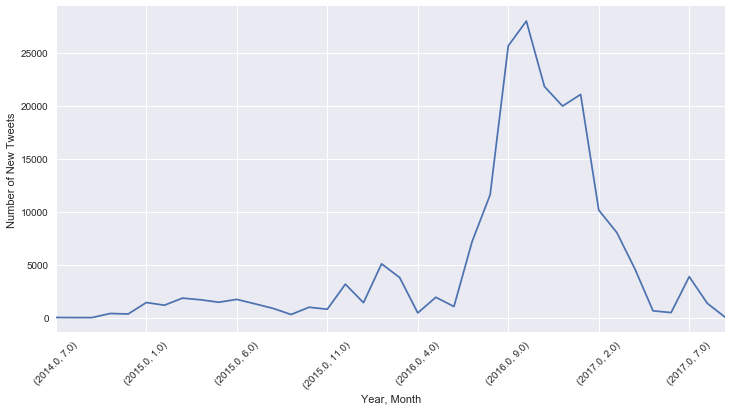

In [19]:
form = '%Y-%m-%d %H:%M:%S'
tweets = tweets.assign(date = tweets.created_str.map(
    lambda x: datetime.strptime(str(x), form).date() if x is not np.nan else None))
tweets = tweets.set_index(pd.DatetimeIndex(tweets.date))

timeseries = tweets.groupby([tweets.index.year, tweets.index.month]).count()
plt.figure(figsize=(12,6))
timeseries.user_id.plot()
plt.xticks(rotation=45)
plt.ylabel('Number of New Tweets')
plt.xlabel('Year, Month')
plt.show()


In [38]:
#Looking at a time series of the top trolls.
tweets.user_key.value_counts()

ameliebaldwin      9269
hyddrox            6813
giselleevns        6652
patriotblake       4140
thefoundingson     3663
melvinsroberts     3346
mrclydepratt       3263
brianaregland      3261
leroylovesusa      3229
baobaeham          3215
melanymelanin      3212
laurabaeley        3201
jeffreykahunas     3197
datwisenigga       3197
ten_gop            3194
emileewaren        3192
garrettsimpson_    3188
jacquelinisbest    3169
_nickluna_         3159
willisbonnerr      3156
michellearry       3156
cookncooks         3143
dorothiebell       3142
paulinett          3057
notritahart        3028
mr_clampin         3010
cassieweltch       3009
traceyhappymom     2990
queenofthewo       2988
kathiemrr          2968
                   ... 
banttanantta          1
peeonhillary          1
reachitdoit           1
moda_barina           1
handsome_henson       1
mbrownhere            1
horrorki              1
fischermaria933       1
dannymaslov           1
zistti                1
arseni_roman    

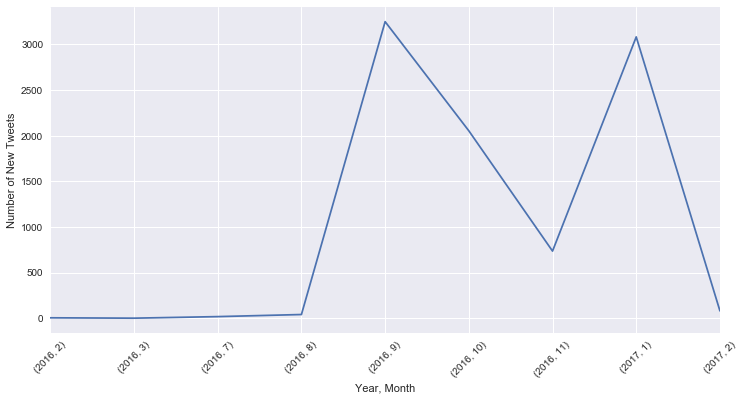

In [35]:
baldwin = tweets[tweets['user_key'] == 'ameliebaldwin']
timeseries = baldwin.groupby([baldwin.index.year, baldwin.index.month]).count()
plt.figure(figsize=(12,6))
timeseries.user_id.plot()
plt.xticks(rotation=45)
plt.ylabel('Number of New Tweets')
plt.xlabel('Year, Month')
plt.show()

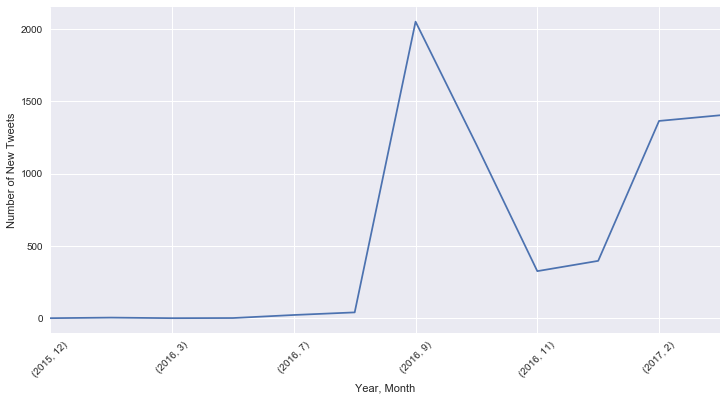

In [43]:
hyddrox = tweets[tweets['user_key'] == 'hyddrox']
timeseries = hyddrox.groupby([hyddrox.index.year, hyddrox.index.month]).count()
plt.figure(figsize=(12,6))
timeseries.user_id.plot()
plt.xticks(rotation=45)
plt.ylabel('Number of New Tweets')
plt.xlabel('Year, Month')
plt.show()

In [46]:
test = tweets.sort_values(['retweet_count'], ascending=[False])
test.head(10)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,date
date,,,,,,,,,,,,,,,
2016-11-17,4.859142e+09,trayneshacole,1.479414e+12,2016-11-17 20:27:21,20494.0,False,26655.0,go all the way off https://t.co/QtScy6u8I7,7.993482e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],2016-11-17
2016-03-12,3.312143e+09,gloed_up,1.457812e+12,2016-03-12 19:50:32,18209.0,False,7252.0,#AnthonyCage was bloodied at St. Louis Trump r...,7.087420e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""AnthonyCage"",""TrumpRallyChi"",""BlackToLive""]",[],POSTED,[],2016-03-12
2016-10-10,4.437234e+09,crystal1johnson,1.476140e+12,2016-10-10 22:55:10,13636.0,False,12815.0,When It’s slowly becoming illegal for black pe...,7.856147e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""BlackTwitter""]",[],POSTED,[],2016-10-10
2016-10-11,4.224730e+09,ten_gop,1.476152e+12,2016-10-11 02:11:02,12078.0,False,10867.0,"OMG, this new Anti-Hillary ad is brilliant!👌\n...",7.856640e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],2016-10-11
2016-10-18,4.224730e+09,ten_gop,1.476816e+12,2016-10-18 18:44:14,12042.0,False,7953.0,RT the hell out of it:\n\nDem party operatives...,7.884506e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""https://twitter.com/i/web/status/78845063389...",POSTED,[],2016-10-18
2016-06-04,4.437234e+09,crystal1johnson,1.465002e+12,2016-06-04 01:06:58,11616.0,False,8969.0,"Muhammad Ali, the only person whose Hollywood ...",7.388998e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],2016-06-04
2016-09-18,2.882332e+09,jenn_abrams,1.474217e+12,2016-09-18 16:42:48,11363.0,False,16068.0,Some guy right in Hillary's face: HILLARY FOR ...,7.775484e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""https://vine.co/v/i1jQFxVOPhF""]",POSTED,[],2016-09-18
2016-10-09,4.437234e+09,crystal1johnson,1.475976e+12,2016-10-09 01:27:00,10823.0,False,10340.0,3 Black children carrying their daily water al...,7.849281e+17,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],2016-10-09
2016-10-20,4.224730e+09,ten_gop,1.476942e+12,2016-10-20 05:40:07,10467.0,False,10437.0,BREAKING🚨 \n\nHillary shuts down press confere...,7.889781e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""VoterFraud""]","[""https://twitter.com/i/web/status/78897808129...",POSTED,[],2016-10-20
